# Figures from "Spatially organized multicellular immune hubs in human colorectal cancer"
## Code for key pannels included in Figure 1


In [1]:
code = '../code/';
codeExternal =  '../external';
data = '../data/';



In [2]:
run([code 'util/run_set_figure_defaults.m']);

% Other options (e.g. svg or eps) are possible:
outSuf = { '-dpng' } 
outDirPlot = { '../results/figures/' };


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MSS'  'Normal'  'MSI_MLH1Meth'  'MSI_MLH1NoMeth'}


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MMRP'  'Normal'  'MMRd'  'MMRd_MLH1NoMeth'}


outSuf =

  1x1 cell array

    {'-dpng'}



In [3]:
addpath(genpath(code))

In [4]:
addpath(genpath(codeExternal))

## Loading main data object

In [5]:

colon10x_default = readDataRobj([ data 'colon10x_default/' ])

Reading: colon10x_default_dDvec_batchID.csv.gz
Read batchID (371223x1) variable
Reading: colon10x_default_dDvec_ensgID.csv.gz
Read ensgID (43078x1) variable
Reading: colon10x_default_dDvec_geneID.csv.gz
Read geneID (43078x1) variable
Reading: colon10x_default_dDvec_sampleID.csv.gz
Read sampleID (371223x1) variable
Reading: colon10x_default_dZ_annot.csv
Read annot (371223x3) table
Reading: colon10x_default_dZ_annot.csv.gz
Read annot (371223x3) table
Reading: colon10x_default_dZ_metatable.csv
Read metatable (371223x26) table
Reading: colon10x_default_dZ_metatable.csv.gz
Read metatable (371223x26) table
Reading: colon10x_default_dSp_rawCount.h5
Processing rawCount as matlab h5 sparse matrix
Read rawCount (43078x371223) sparse matrix

colon10x_default = 

  struct with fields:

      batchID: {371223x1 cell}
       ensgID: {43078x1 cell}
       geneID: {43078x1 cell}
     sampleID: {371223x1 cell}
        annot: [1x1 struct]
    metatable: [1x1 struct]
     rawCount: [43078x371223 double]


## Loading tSNE coordinate files

In [6]:


[zFile,~,zFname] = fileList([ data 'cNMF_tSNE/*.gz']);

zFname = regexprep(zFname,'.tsv.gz','');
zFname = regexprep(zFname,'crc295v4_cNMF_tSNE_','');
zFname = regexprep(zFname,'allImm','Imm');
zFname{end} = 'global';

for zi = 1:length(zFname)
   [zRaw,~,zH] = fastMatRead(zFile{zi});    
   tSNE_coord.(zFname{zi}).sampleID = zH;
   tSNE_coord.(zFname{zi}).ydata = zRaw;
end

tSNE_coord


tSNE_coord = 

  struct with fields:

               B: [1x1 struct]
             Epi: [1x1 struct]
         Epi_MSI: [1x1 struct]
         Epi_MSS: [1x1 struct]
      Epi_Normal: [1x1 struct]
         Myeloid: [1x1 struct]
          Plasma: [1x1 struct]
           Strom: [1x1 struct]
            TCD4: [1x1 struct]
            TCD8: [1x1 struct]
          TNKILC: [1x1 struct]
    TnonCD4orCD8: [1x1 struct]
             Imm: [1x1 struct]
         Imm_MSI: [1x1 struct]
         Imm_MSS: [1x1 struct]
      Imm_Normal: [1x1 struct]
          global: [1x1 struct]



## Load ccNMF summary file

In [7]:
ccNMFexpAlt = load([ data 'matlab/crc10x_c295v4_basic_ccNMFv6_reExp_qN_subSet.mat'])

zSubG = ismember(ccNMFexpAlt.ensgID,colon10x_default.ensgID);
ccNMFexpAlt = structSubSelectMat(ccNMFexpAlt,zSubG);
assert(isequal(ccNMFexpAlt.ensgID,colon10x_default.ensgID));


ccNMFexpAlt = 

  struct with fields:

          Hmat: [1x1 struct]
          Kdim: [14 7 22 11 25 21 29 32 43]
          Wmat: [1x1 struct]
       batchID: {371223x1 cell}
     batchList: {1x9 cell}
        ensgID: {43113x1 cell}
        geneID: {43113x1 cell}
      isSample: [371223x9 logical]
     isVarGene: [43113x9 logical]
      sampleID: {371223x1 cell}
        wNames: {1x9 cell}
     wNamesExp: {1x9 cell}
    wNamesOrig: [1x1 struct]
      wNamesSt: [1x1 struct]



In [8]:
%% Figure 1 

zOutP = 'Figure_1'

zMergeT = struct2table(groupTable(colon10x_default.metatable,'PatientTypeID'));
[zB,~,~,zCnt,zPos] = fastUnique(zMergeT.MMRStatus);

zBlues = brewermap(zCnt(1),'blues');
zGreens = brewermap(zCnt(2),'YlGn');
zReds = brewermap(zCnt(3),'OrRd');

zCombMap = [ zReds; zBlues; zGreens; ];

colon10x_default.metatable.MMRStatusTumor = colon10x_default.metatable.MMRStatus;
colon10x_default.metatable.MMRStatusTumor = regexprep(colon10x_default.metatable.MMRStatusTumor,'NA','Normal');
zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);


zOutP =

    'Figure_1'

Done - return
Done - return



zopts =

     []

Saving plot: ../results/figures//Figure_1/Fig1a_tSNE_global_topLevelCl.png.-dpng


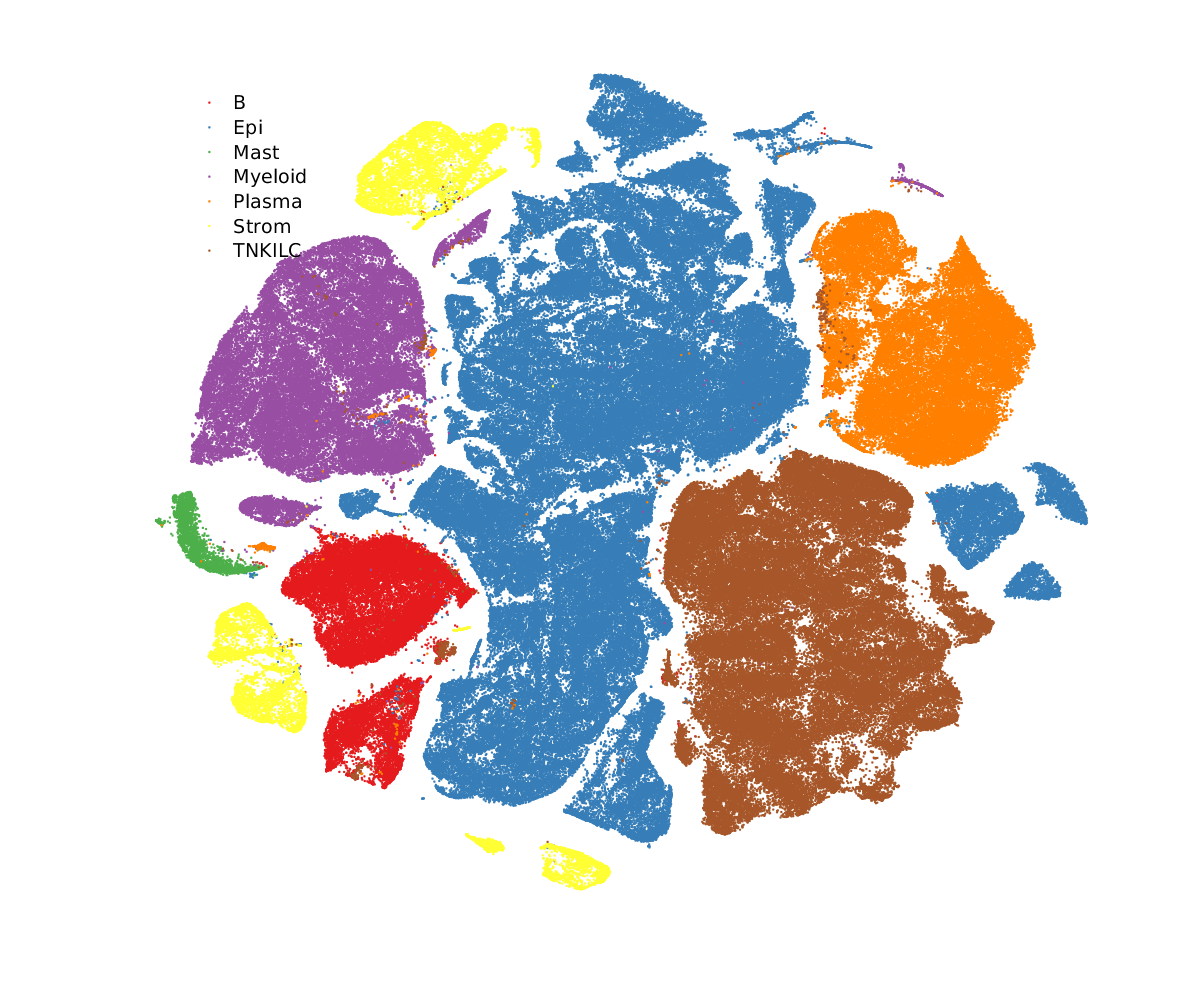

In [9]:
%plot -s 1200,1000

zcf = 'global';
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);

zCmap = brewermap(7,'Set1');

zopts = [];
zopts.pSize = 5;
zopts.doAlpha = 0.7;

plot_tsne_scatter(zYdata,colon10x_default.annot.clTopLevel(zia),zCmap,[],zopts);
zfig = gcf;

axis off 
axis tight

% Todo: fix colors

zOutPlot = sprintf('%s/Fig1a_tSNE_%s_topLevelCl',zOutP,zcf);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf,1);


zcf =

    'global'


zopts =

     []

Saving plot: ../results/figures//Figure_1/Fig1b_tSNE_global_MMR.png.-dpng


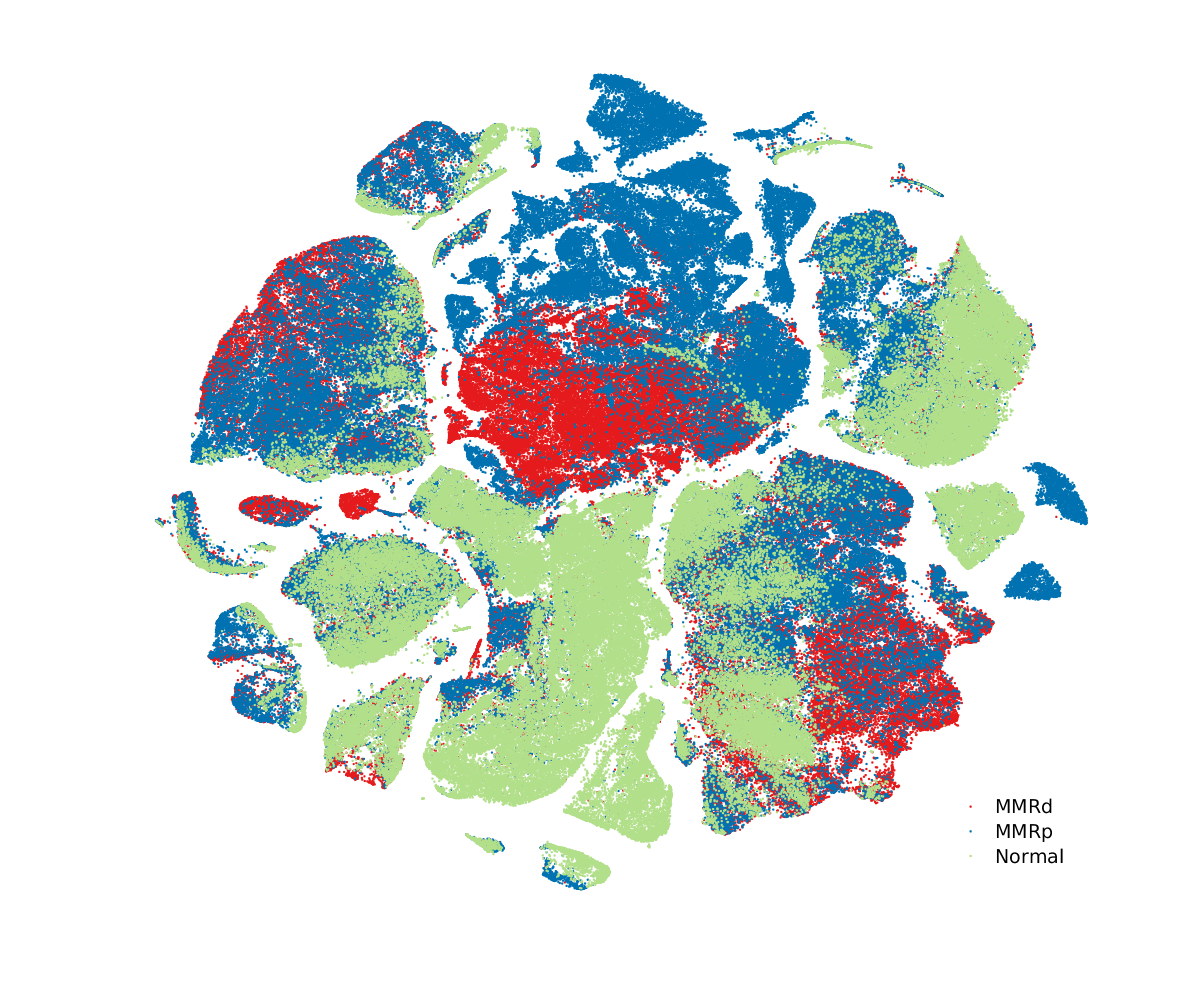

In [10]:
zcf = 'global'
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);

zCmap = colorSet(zColSet.crcTypeC);

zopts = [];
zopts.pSize = 5;
zopts.doAlpha = 0.7;

plot_tsne_scatter(zYdata,colon10x_default.metatable.MMRStatusTumor(zia),zCmap,[],zopts);
zfig = gcf;

axis off 
axis tight
% legend off

%% 
zOutPlot = sprintf('%s/Fig1b_tSNE_%s_MMR',zOutP,zcf);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)


zcf =

    'global'


zopts =

     []

Saving plot: ../results/figures//Figure_1/Fig1c_tSNE_global_byPidColor.png.-dpng


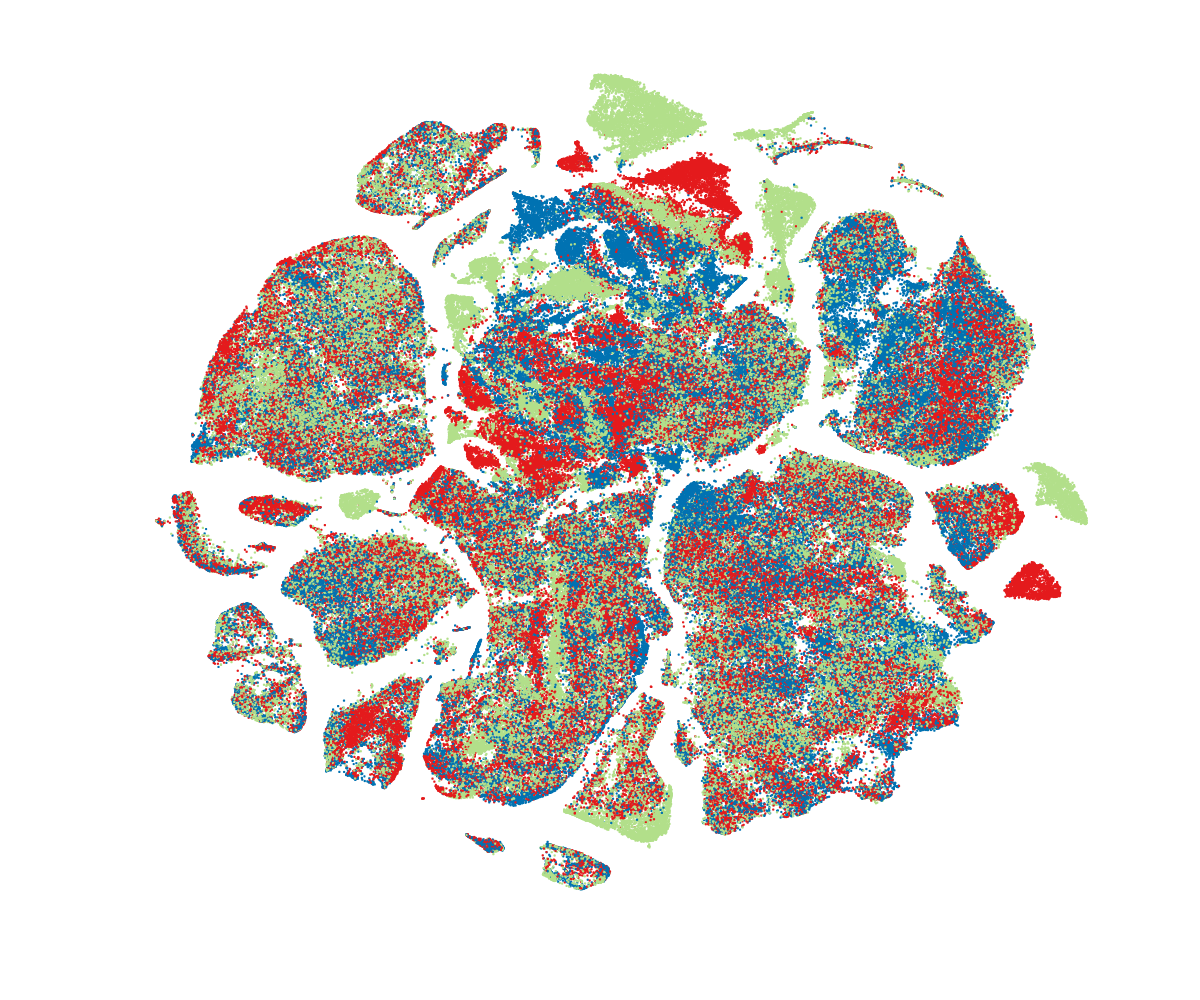

In [11]:
%% MMR plot 

zcf = 'global'
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);

zCmapRand = [ colorSet(zColSet.rainbow21); colorSet(zColSet.rainbow18); colorSet(zColSet.rainbow14);];
zCmapRand = zCmapRand(randperm(length(zCmapRand)),:);

zopts = [];
zopts.pSize = 5;
zopts.doAlpha = 0.7;

plot_tsne_scatter(zYdata,zBID(zia),zCmap,[],zopts);
zfig = gcf;

axis off 
axis tight
legend off

zOutPlot = sprintf('%s/Fig1c_tSNE_%s_byPidColor',zOutP,zcf);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)




zcf =

    'global'


zopts =

     []

Saving plot: ../results/figures//Figure_1/tSNE_global_byPid.png.-dpng


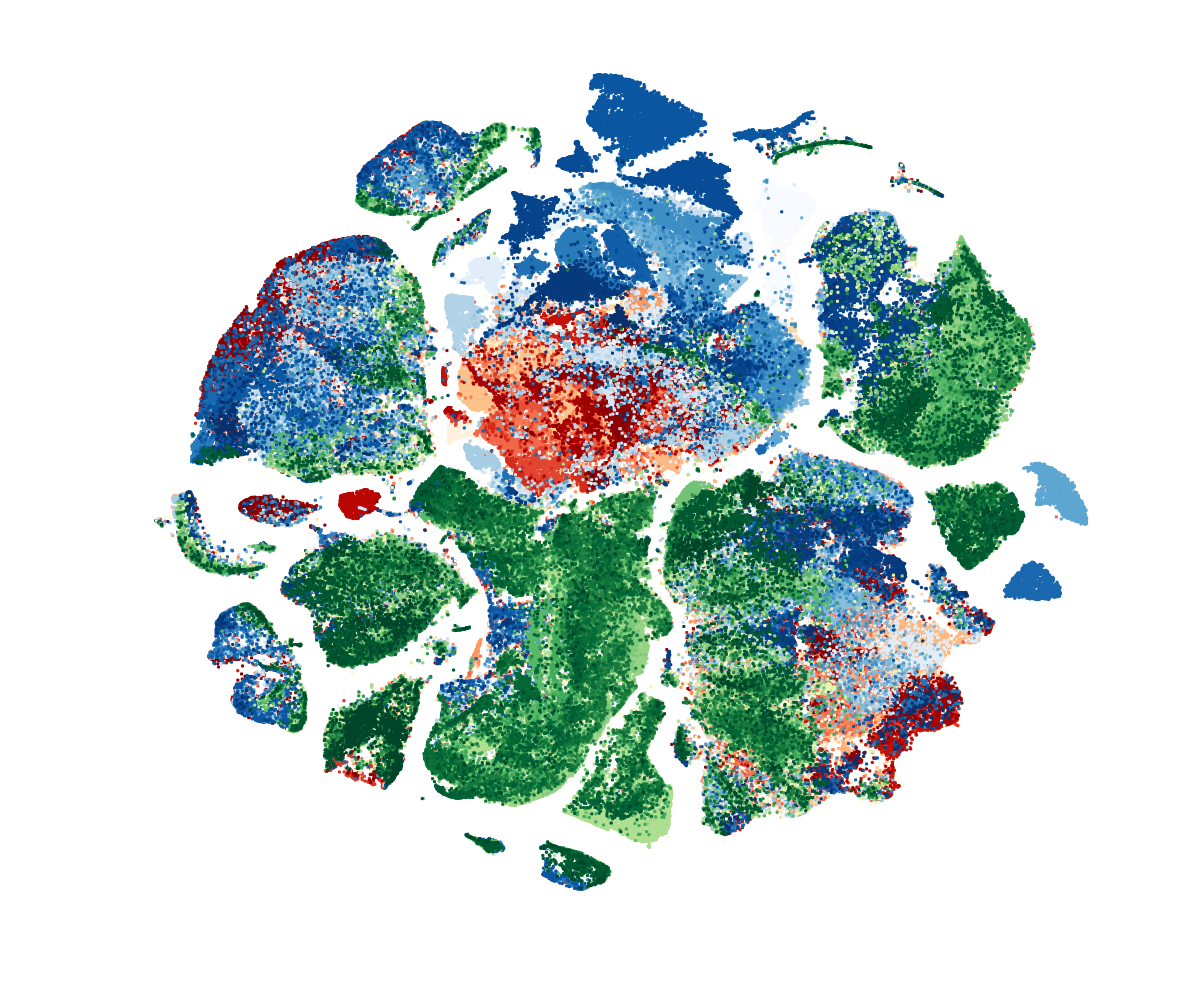

In [12]:
%% Global by PID 
% MMRd, MMRp, and Normal patients in shaded ins reds, blues, and greens respectively. 


zcf = 'global'
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);


zYdata = tSNE_coord.(zcf).ydata(zib,:);

zopts = [];
zopts.pSize = 7;
zopts.doAlpha = 0.7;

plot_tsne_scatter(zYdata,zBID(zia),zCombMap,[],zopts);
zfig = gcf;

axis off 
axis tight
legend off

%%

zOutPlot = sprintf('%s/tSNE_%s_byPid',zOutP,zcf);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)


zopts =

     []

Saving plot: ../results/figures//Figure_1/Fig1c_tSNE_global_Hmat_EpiTMSIv4ForceK29_1.png.-dpng
Saving plot: ../results/figures//Figure_1/Fig1c_tSNE_global_Hmat_EpiTMSIv4ForceK29_2.png.-dpng
Saving plot: ../results/figures//Figure_1/Fig1c_tSNE_global_Hmat_EpiTMSIv4ForceK29_3.png.-dpng


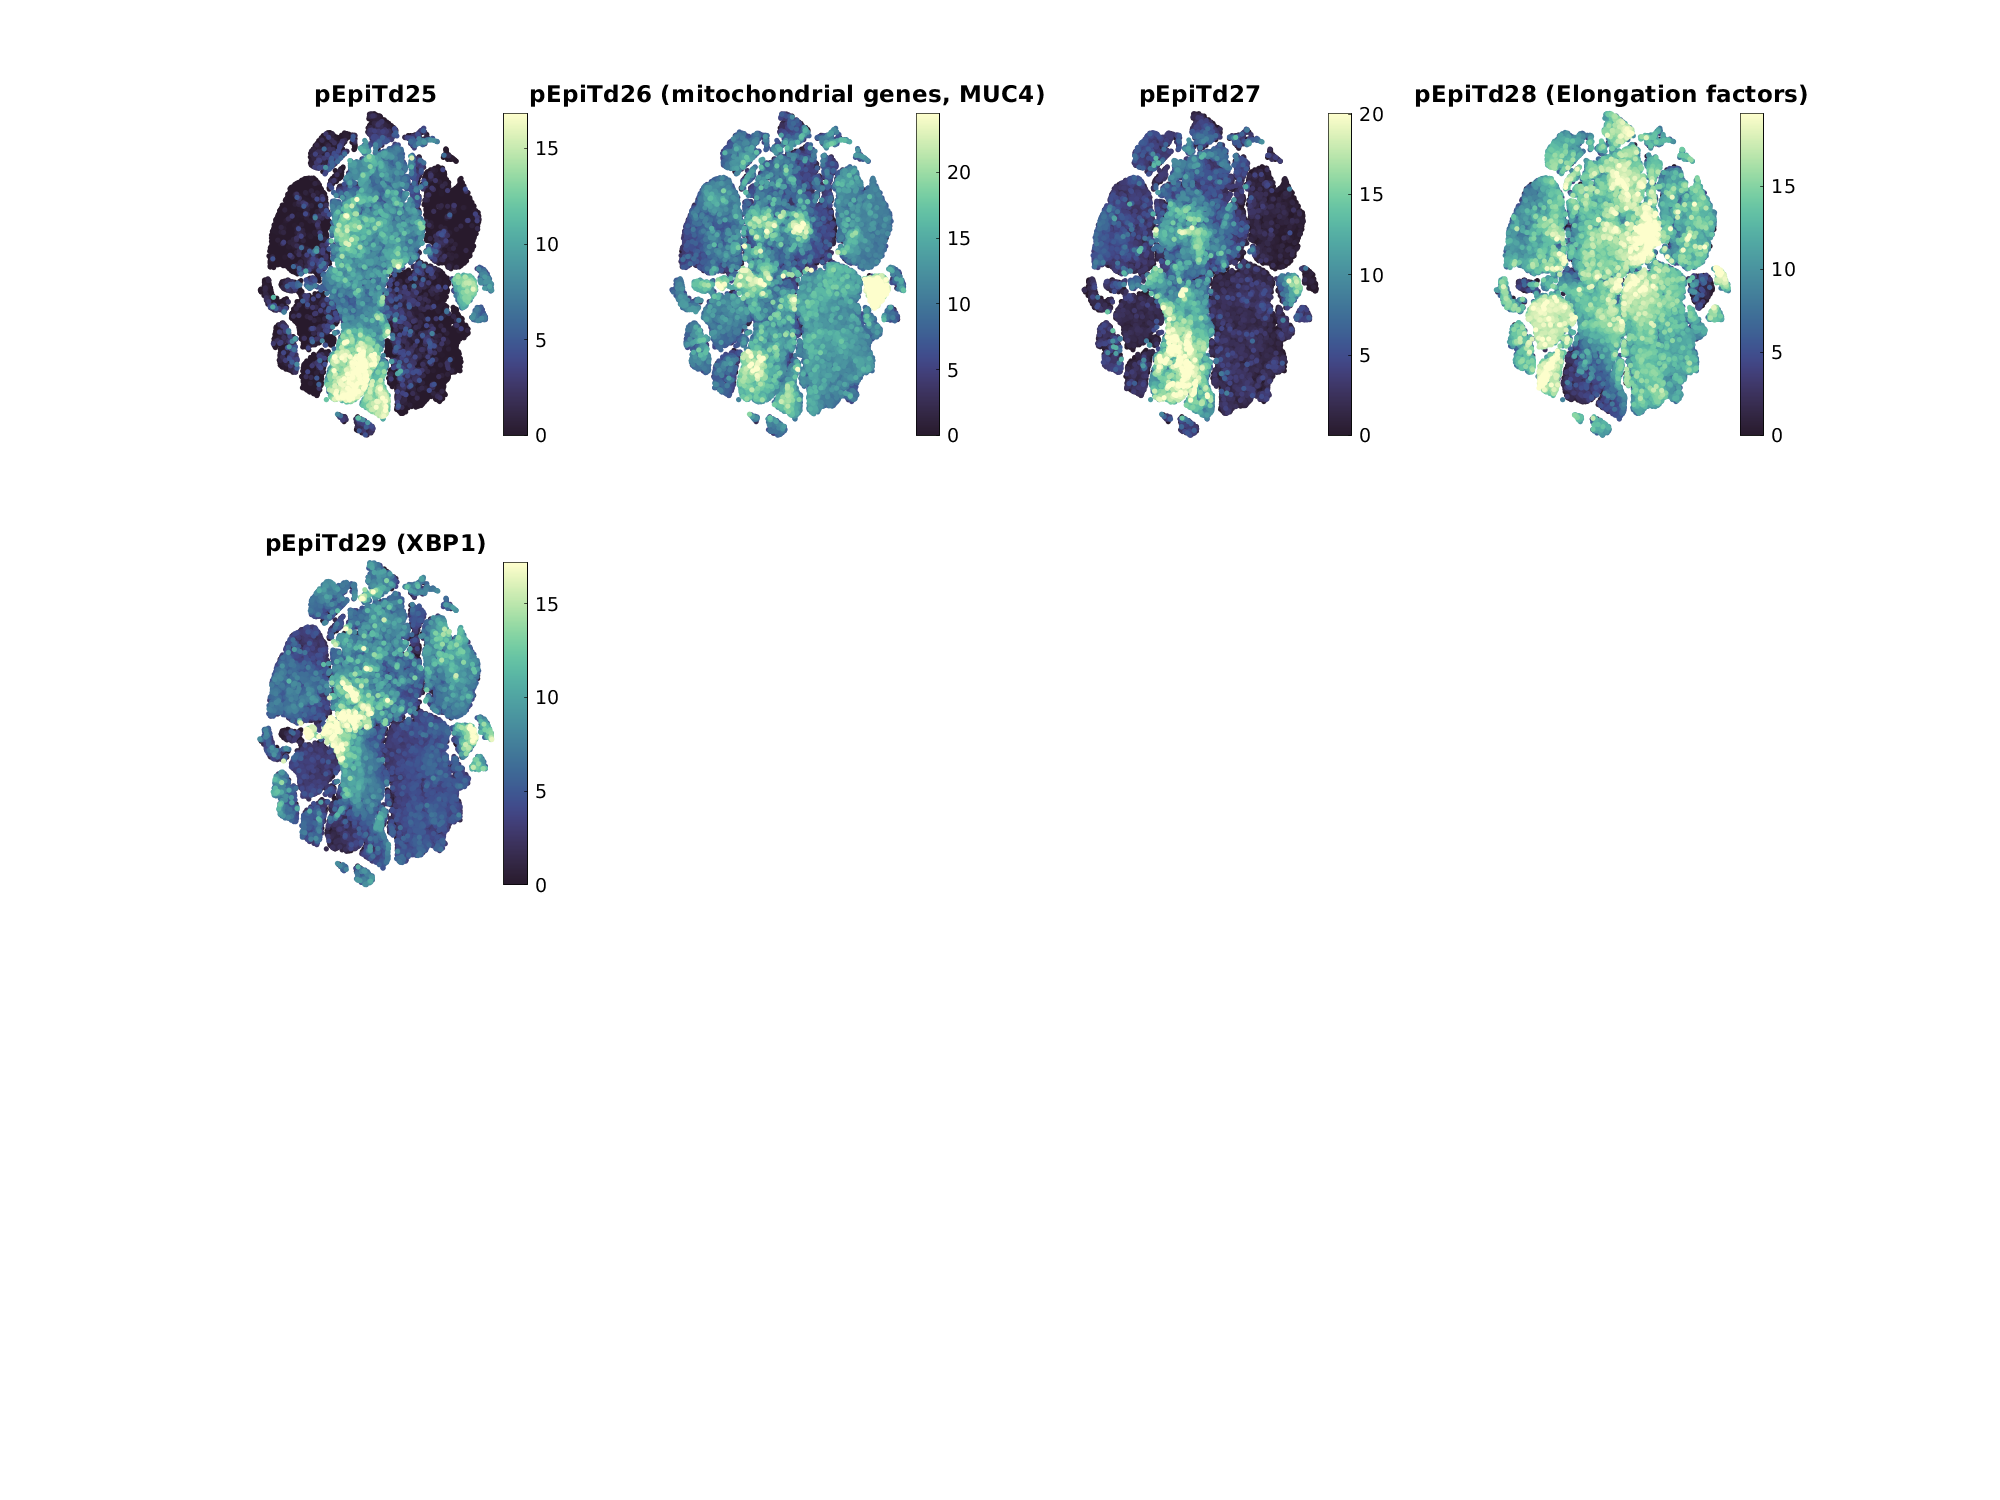

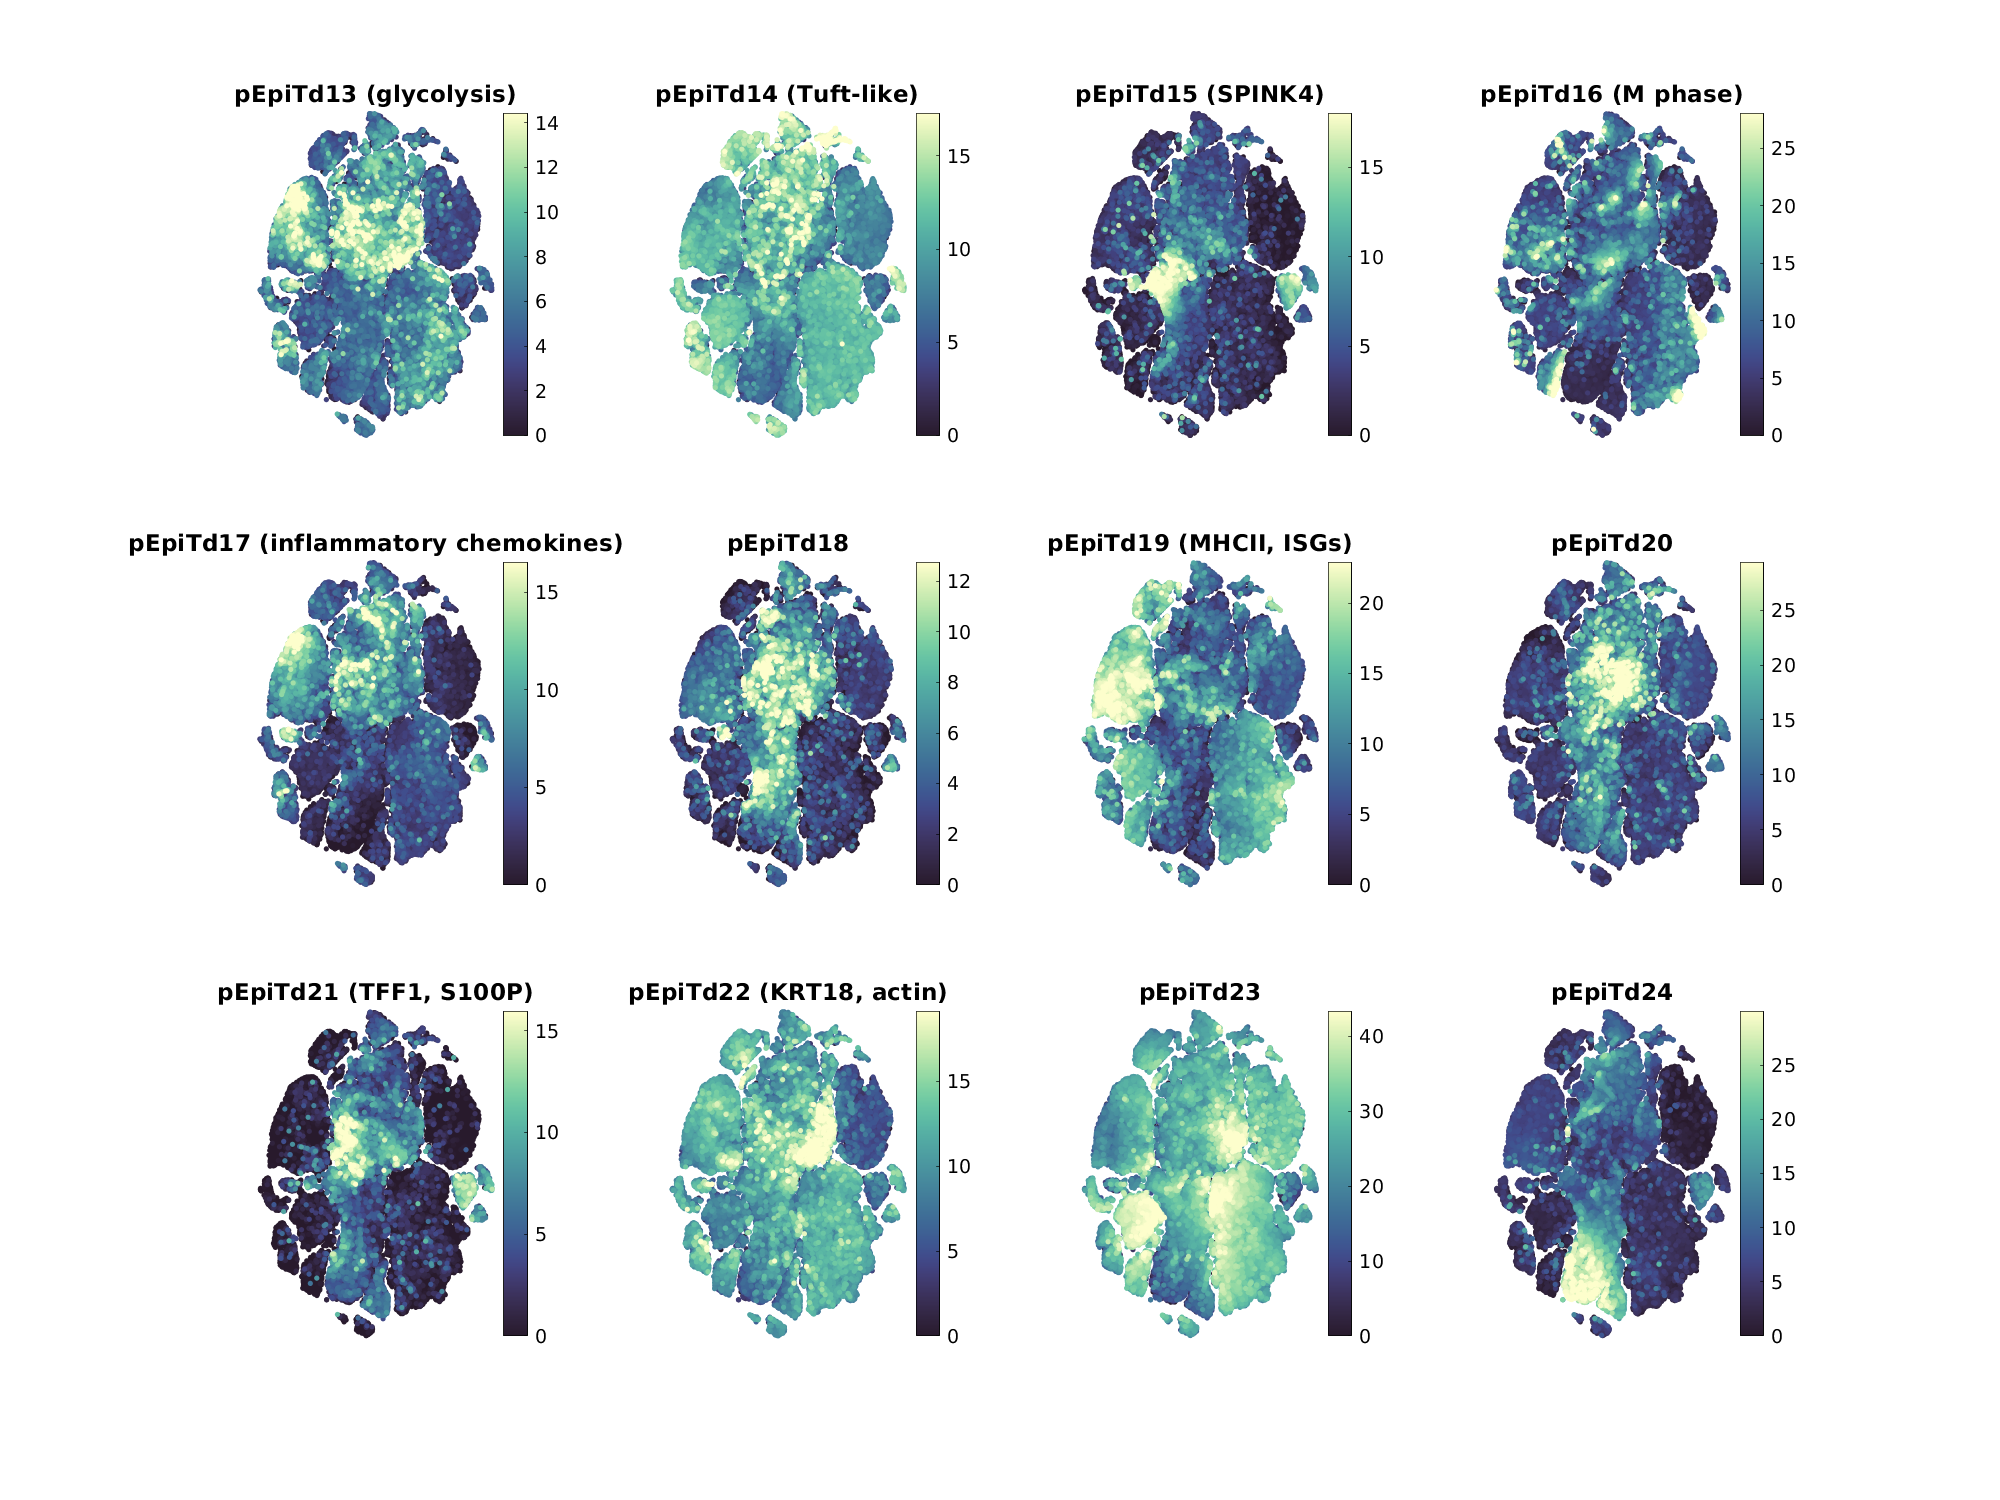

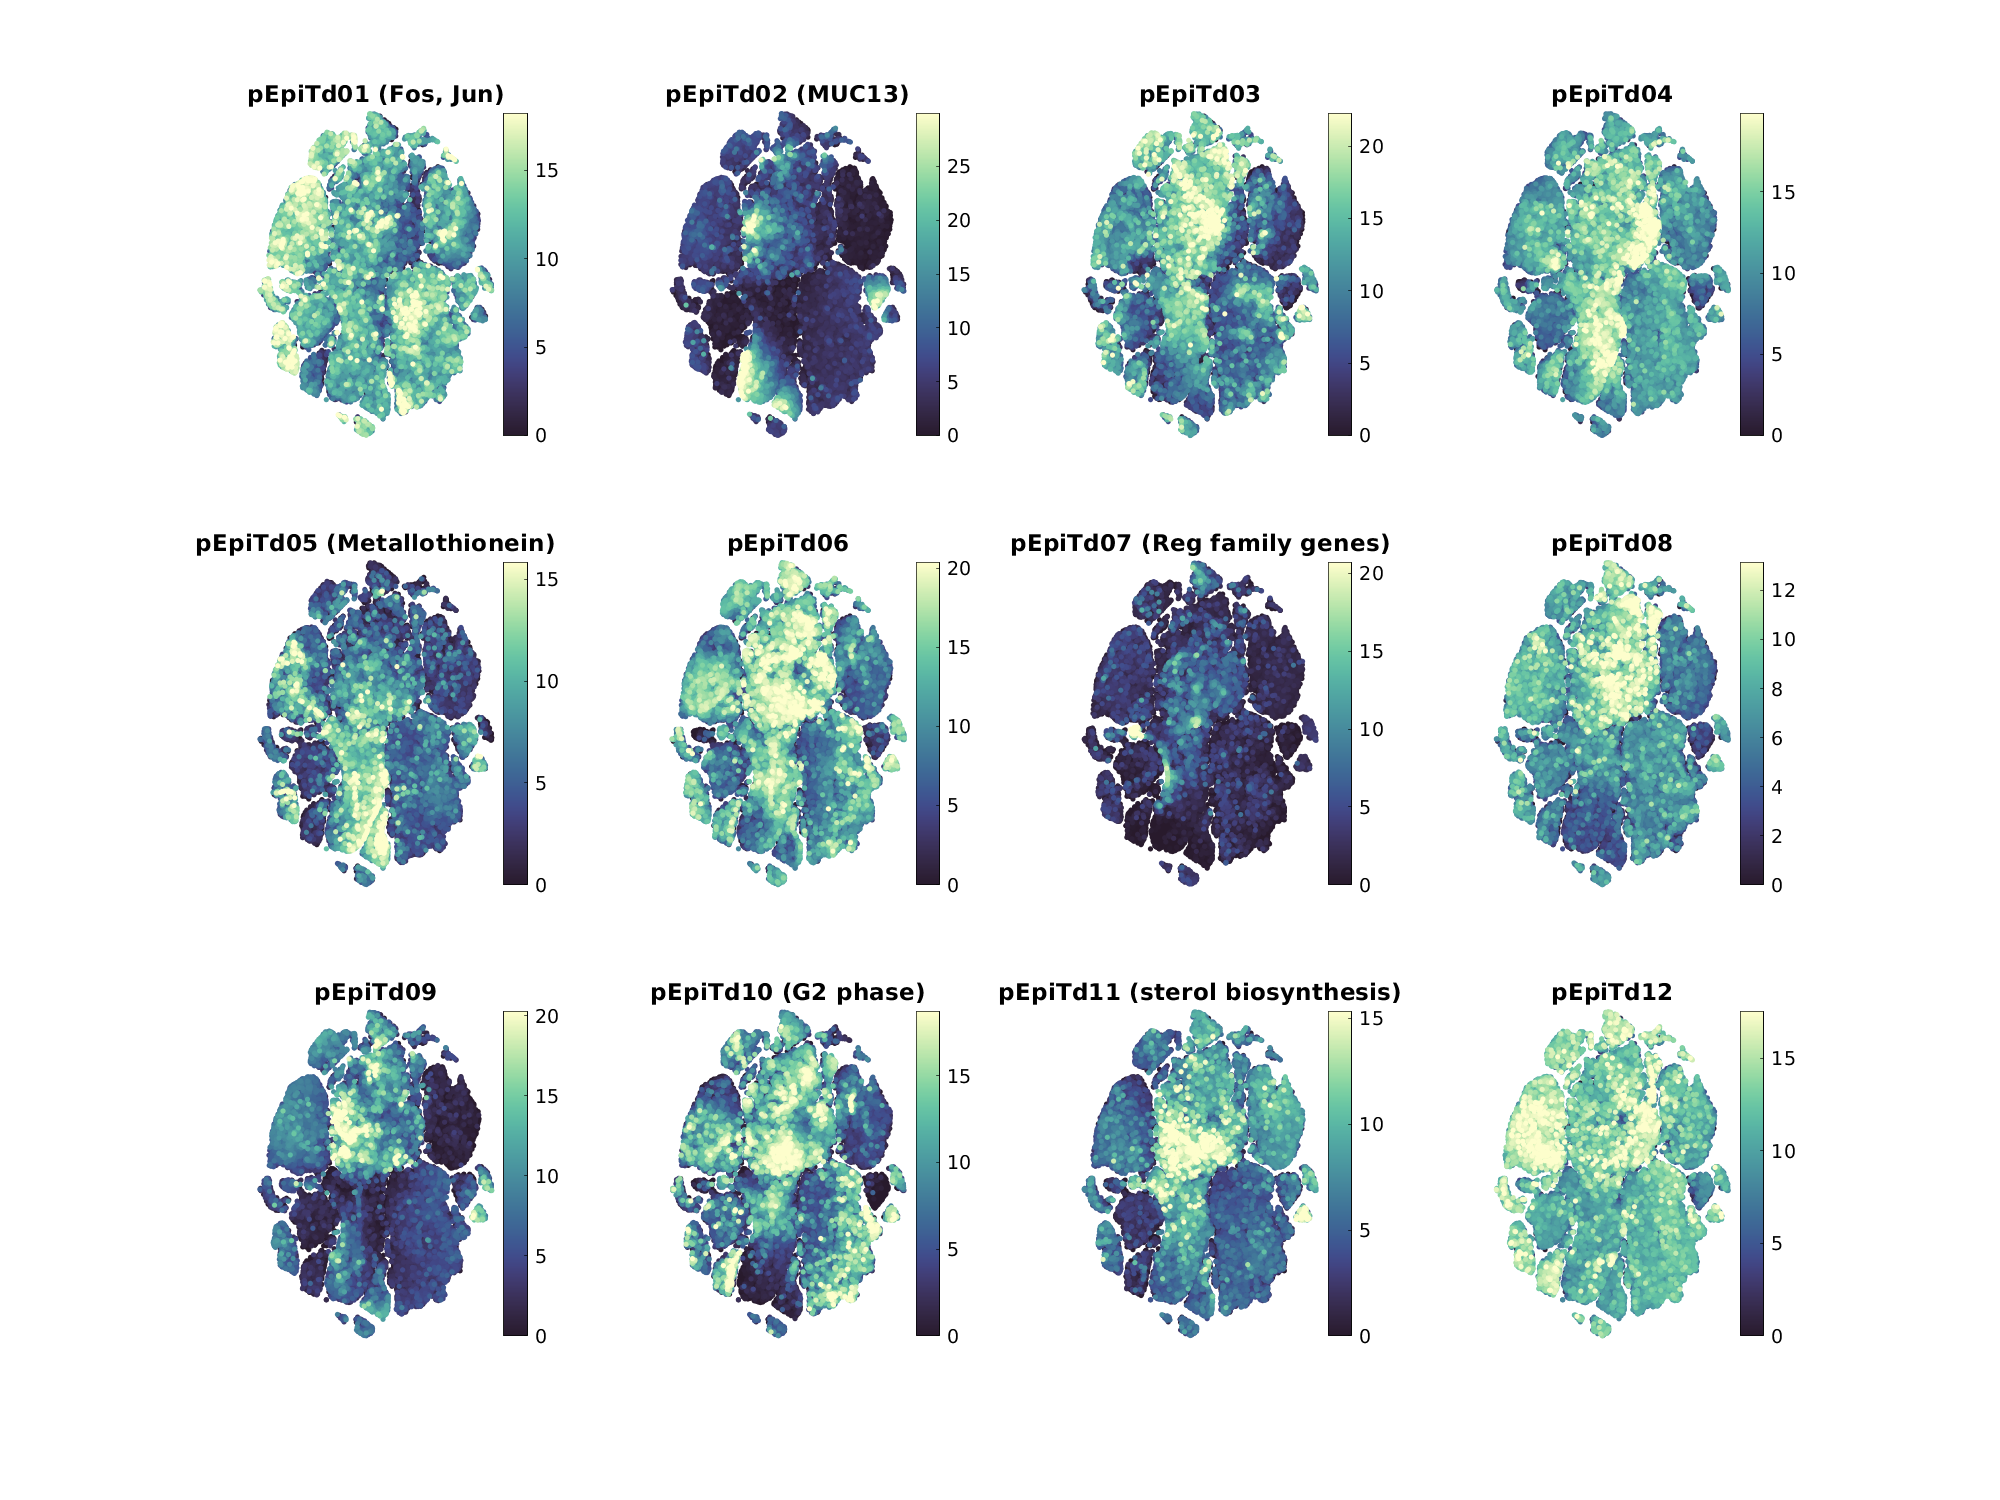

In [13]:
%plot -s 2000,1500
%% Plot program NMF on tSNE
% Todo update colormap

zcf = 'global';
zp = 'EpiTMSIv4ForceK29';

[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);
zHval = ccNMFexpAlt.Hmat.(zp)';

zopts = [];
zopts.pSize = 7;
zopts.doAlpha = 0.7;
zopts.qTrimLimNNZ = 0.999;
zopts.titleText = ccNMFexpAlt.wNamesSt.(zp);

zopts.cmap = flipud(cptcmap('deep'));

zfig = plot_tsne_scatter_multi(zYdata,zHval(zia,:),[],[],zopts);

%% 

zOutPlot = sprintf('%s/Fig1c_tSNE_%s_Hmat_%s',zOutP,zcf,zp);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% cellfun(@(x)close(x),zfig)